# Capstone Project 2

## Book Recommendation using Different Features

Picking the best book to read is important in order to not spending long time to figure out if the book is right choice or not. This gets more critical if we spend same amount of time to read each book before finding the right one, specially, considering different genres, Publishers, Book Authors or Year of Publications. We can use this information and reader age and location to
recommend the best book to read by user. This can be done by using the ratings that have been given to previous books by readers. This recommendation system can help the reader to pick the best books and can generate the better results over time, when reader(s) give more rates to the book(s).
The tables and the fields are as below:
Users: User IDs, Location, Age
Books: ISBN, Book title, Book Author, Year of Publication, Publisher, Image_url_S, Image_url_M, Image_url_L
Rating: User IDs, ISBN, Book Rating

### Data Wrangling and Cleaning

In Data Cleaning Part, I need to explore the values in the column, which I have done it.then make the modification, if needed. at the end, I merge all three tables to work with only one table.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing tables
users = pd.read_table('D://Capstone Project 2//BX-CSV-Dump//BX-Users.csv',sep=';',encoding="ISO-8859-1")

ratings = pd.read_table('D://Capstone Project 2//BX-CSV-Dump///BX-Book-Ratings.csv',sep=';',encoding = 'unicode_escape')

books = pd.read_table('D://Capstone Project 2//BX-CSV-Dump//BX-Books.csv',sep=';',error_bad_lines=False,encoding="ISO-8859-1")



b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
# Users
#users=pd.concat([users.iloc[:,0].str.split(';',expand=True)],1).iloc[:,0:3]
#users.user_id = users.user_id.apply(lambda x: x.replace('"',''))
#users.location = users.location.apply(lambda x: x.replace('"',''))
#users.age = users.age.astype(str)
#users.age = users.age.apply(lambda x: x.replace('"',''))
users[['city','state','country']] = users['Location'].str.split(',',expand=True,).iloc[:,0:3]
#users = users.drop(['Location'],axis=1)
users.columns = ['user_id','Location','age','city','state','country']
users.head()

,user_id,Location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


let's list the uniques values of Age, so we can clean it if necessory.
data looks clean. but the range of values is not correct which we fix this issue later. 

In [4]:
users.age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [5]:
# Ratings
#ratings = pd.concat([ratings.iloc[:,0].str.split(';',expand=True)],1)
ratings.columns = ['user_id','isbn','rate']
#ratings.user_id = ratings.user_id.apply(lambda x: x.replace('"',''))
#ratings.isbn = ratings.isbn.apply(lambda x: x.replace('"',''))
#ratings.rate = ratings.rate.astype(str)
#ratings.rate = ratings.rate.apply(lambda x: x.replace('"',''))
ratings.head()

,user_id,isbn,rate
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Books
books = books.iloc[:,0:5]
books.columns = ['isbn','book_title','book_author','year_of_publication', 'publisher']
#books.isbn = books.isbn.apply(lambda x: x.replace('"',''))
#books.book_title = books.book_title.apply(lambda x: x.replace('"',''))
#books.book_author = books.book_author.apply(lambda x: x.replace('"',''))
#books.year_of_publication = books.year_of_publication.apply(lambda x: x.replace('"',''))
#books.publisher = books.publisher.apply(lambda x: x.replace('"',''))
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


now, we explore the values of year_of_publication. two values seem incorrect: 'Gallimard' and 'DK Publishing Inc'.

In [7]:
books.year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [8]:
books.loc[books.year_of_publication == 'DK Publishing Inc',: ]
# this shows that values entered in wrong columns

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [9]:
books.loc[books.isbn == '078946697X', 'year_of_publication'] = 2000
books.loc[books.isbn == '0789466953', 'year_of_publication'] = 2000
books.loc[books.isbn == '078946697X','book_author' ] = 'Michael Tetitelbaum'
books.loc[books.isbn == '0789466953','book_author' ] = 'James Buckley'
books.loc[books.isbn == '078946697X','publisher' ] = 'DK Publishing Inc'
books.loc[books.isbn == '0789466953','publisher' ] = 'DK Publishing Inc'

In [10]:
books.loc[books.year_of_publication == 'Gallimard',: ]

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [11]:
books.loc[books.isbn == '2070426769', 'year_of_publication'] = 2003
books.loc[books.isbn == '078946697X','book_author' ] = 'Jean-Marie Gustave Le CIA?A@zio'
books.loc[books.isbn == '078946697X','publisher' ] = 'Gallimard'
books.loc[books.isbn == '078946697X','book_title' ] = "Peuple du ciel, suivi de 'Les Bergers"

In [12]:
# Looks Good!
books.year_of_publication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
# Merging the tables and organizing it
df = pd.merge(pd.merge(users, ratings,on='user_id'),books,on='isbn')
df = df[['user_id','isbn','city','state','country','Location','age','book_title','book_author','year_of_publication','publisher','rate']]
df.sort_values(['user_id','isbn'])
df.head()

,user_id,isbn,city,state,country,Location,age,book_title,book_author,year_of_publication,publisher,rate
0,2,0195153448,stockton,california,usa,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,8,0002005018,timmins,ontario,canada,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,11400,0002005018,ottawa,ontario,canada,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,11676,0002005018,n/a,n/a,n/a,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
4,41385,0002005018,sudbury,ontario,canada,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [14]:
#Taking care of missing values
#pd.Series(df['city'] == '').value_counts() #by using this query, we can count the number of values
df.replace('n/a',np.nan,inplace=True)
df.replace(' n/a',np.nan,inplace=True)
df.replace(' ',np.nan,inplace=True)
df.replace('',np.nan,inplace=True)
df.replace('NULL',np.nan,inplace=True)
df.fillna(np.nan,inplace = True)
df.head()

,user_id,isbn,city,state,country,Location,age,book_title,book_author,year_of_publication,publisher,rate
0,2,0195153448,stockton,california,usa,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0
1,8,0002005018,timmins,ontario,canada,"timmins, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
2,11400,0002005018,ottawa,ontario,canada,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0
3,11676,0002005018,NaN,NaN,NaN,"n/a, n/a, n/a",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8
4,41385,0002005018,sudbury,ontario,canada,"sudbury, ontario, canada",NaN,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0


In [15]:
#pd.Series(df['age']).value_counts()

In [16]:
# Fix the data type
df.user_id = df.user_id.astype('float')
df.age = df.age.astype('float')
df.rate = df.rate.astype('float')

In [17]:
# Replacing ages higher than 110 or less than 8 with NaN
df.mask((df.age >= 110)| (df.age <= 8)  , inplace=True)
# Removing any years except before 2012
df.year_of_publication.replace(['DK Publishing Inc','Gallimard'],np.nan,inplace=True)
# Removing zero from year_of_publication
df.year_of_publication = df.year_of_publication.astype('float')
df.mask((df.year_of_publication == 0) | (df.year_of_publication >= 2020), inplace=True)
# Removing rates that are zero
df.mask(df.rate == 0,inplace=True)

In [18]:
df.describe()

,user_id,age,year_of_publication,rate
count,376315.000000,263745.000000,376315.000000,376315.000000
mean,136051.934047,36.812197,1995.703618,7.627464
std,80445.952345,12.452080,7.432823,1.841125
min,8.000000,9.000000,1376.000000,1.000000
25%,67677.000000,28.000000,1993.000000,7.000000
50%,133790.000000,35.000000,1998.000000,8.000000
75%,206162.000000,45.000000,2001.000000,9.000000
max,278854.000000,109.000000,2011.000000,10.000000


In [19]:
df.groupby('rate').size()

rate
1.0      1445
2.0      2318
3.0      5001
4.0      7461
5.0     44525
6.0     31038
7.0     65085
8.0     89925
9.0     59617
10.0    69900
dtype: int64

### Data Visualization

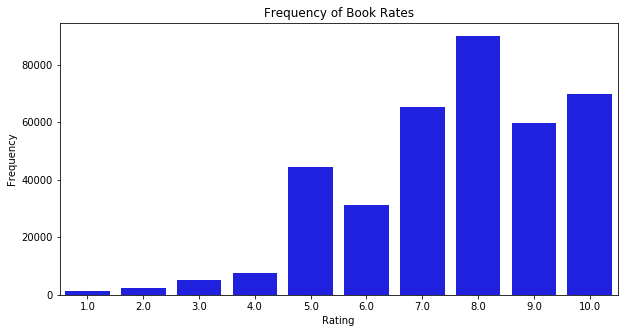

In [20]:
plt.subplots(figsize=(10,5))
ax = sns.countplot(x='rate', data=df,color='blue')
plt.title('Frequency of Book Rates')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

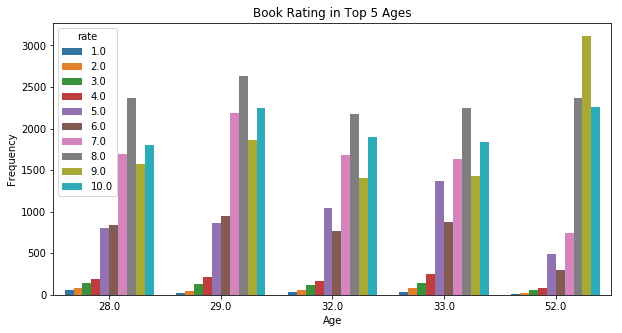

In [21]:
plt.subplots(figsize=(10,5))
sns.countplot(x="age", hue="rate", data=df,order=df.age.value_counts().iloc[:5].index.sort_values())
plt.title('Book Rating in Top 5 Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

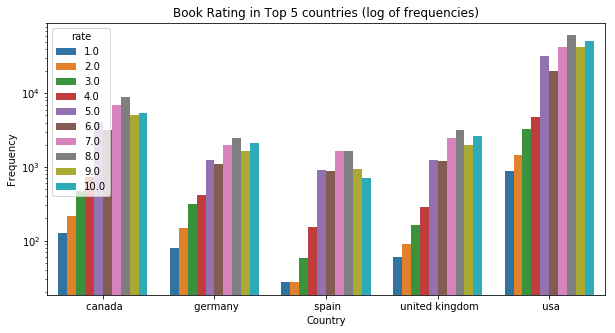

In [22]:
plt.subplots(figsize=(10,5))
sns.countplot(x="country", hue="rate", data=df,order=df.country.value_counts().iloc[:5].index.sort_values())
plt.yscale('log')
plt.title('Book Rating in Top 5 countries (log of frequencies)')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

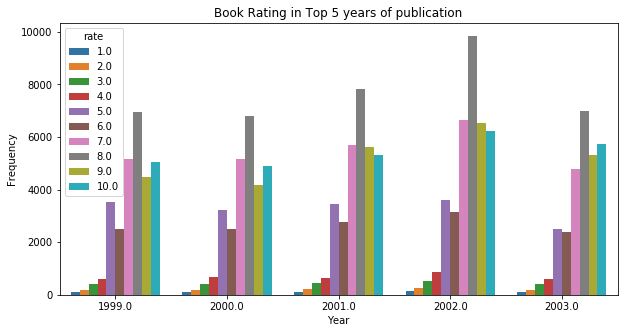

In [23]:
plt.subplots(figsize=(10,5))
sns.countplot(x="year_of_publication", hue="rate", data=df,order=df.year_of_publication.value_counts().iloc[:5].index.sort_values())
plt.title('Book Rating in Top 5 years of publication')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

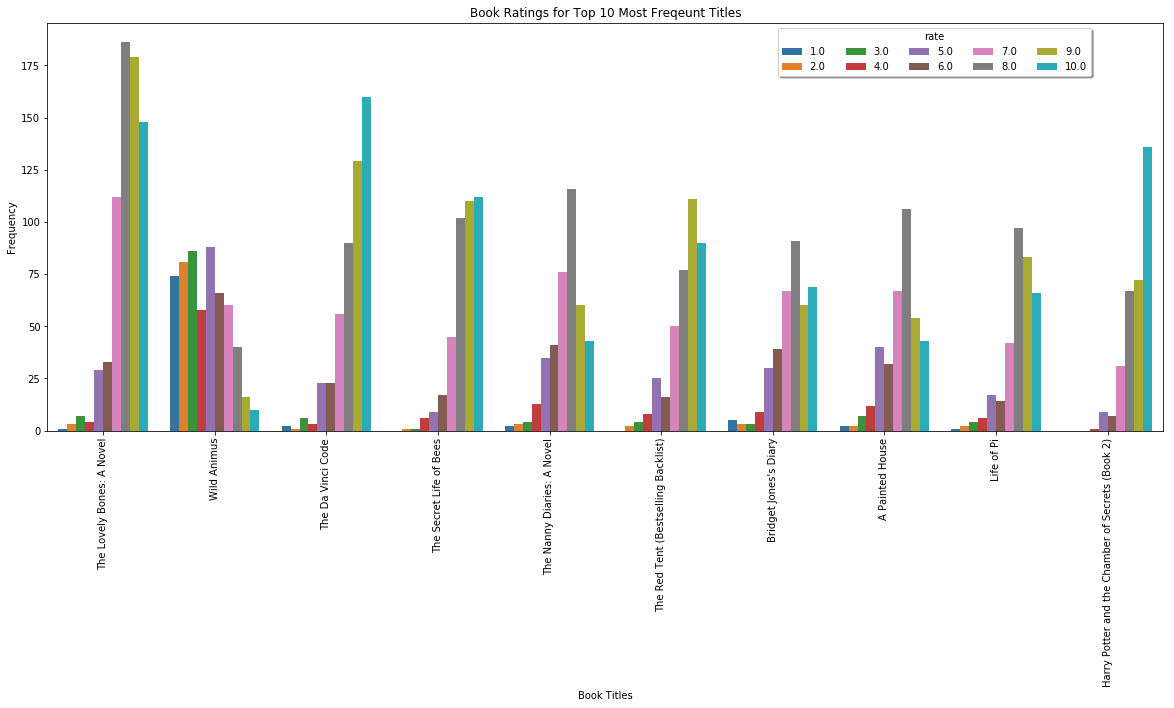

In [24]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="book_title", hue="rate", data=df,order=df.book_title.value_counts().iloc[:10].index)
plt.title('Book Ratings for Top 10 Most Freqeunt Titles')
plt.xlabel('Book Titles')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(0.65, 1),ncol=5, fancybox=True, shadow=True,title='rate')
plt.show()

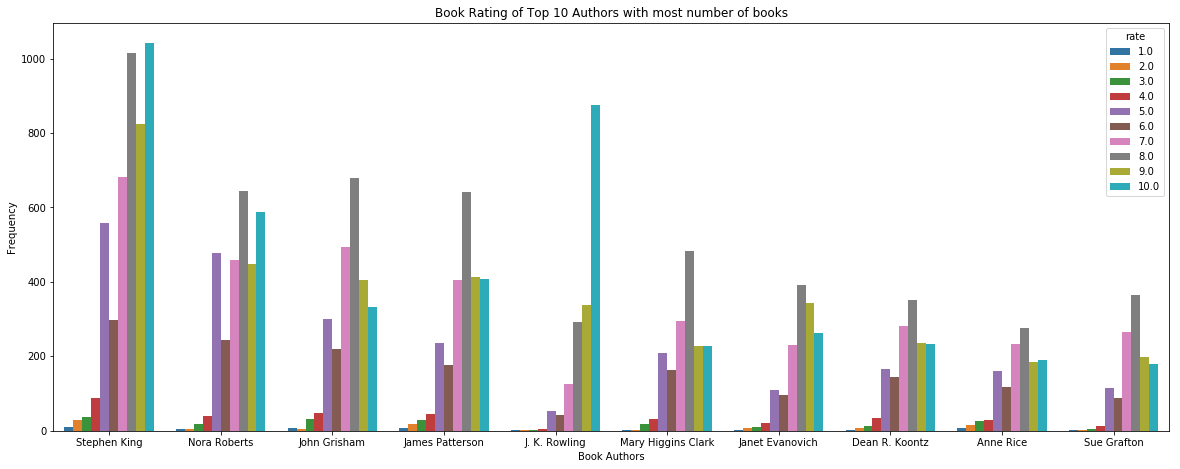

In [25]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="book_author", hue="rate", data=df,order=df.book_author.value_counts().iloc[:10].index)
plt.title('Book Rating of Top 10 Authors with most number of books')
plt.xlabel('Book Authors')
plt.ylabel('Frequency')
plt.show()

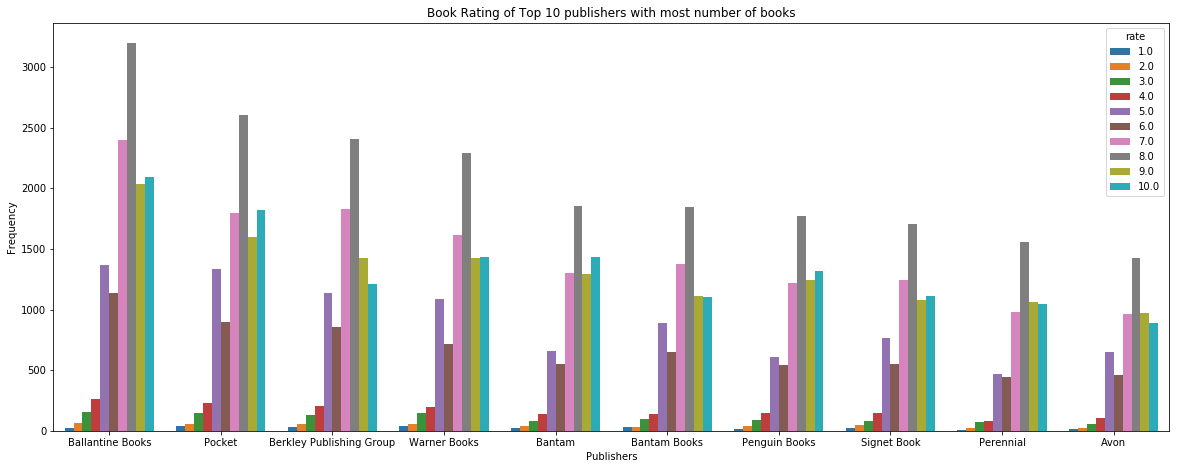

In [26]:
plt.subplots(figsize=(20,7.5))
sns.countplot(x="publisher", hue="rate", data=df,order=df.publisher.value_counts().iloc[:10].index)
plt.title('Book Rating of Top 10 publishers with most number of books')
plt.xlabel('Publishers')
plt.ylabel('Frequency')
plt.show()

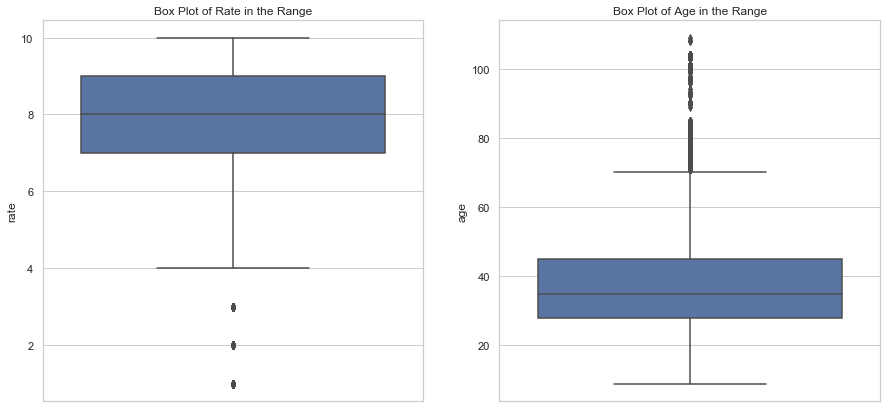

In [27]:
plt.subplots(figsize=(15,7))
sns.set(style="whitegrid")
plt.subplot(1,2,1)
sns.boxplot(y=df.rate)
plt.title('Box Plot of Rate in the Range')
plt.subplot(1,2,2)
sns.boxplot(y=df.age)
plt.title('Box Plot of Age in the Range')
plt.show()

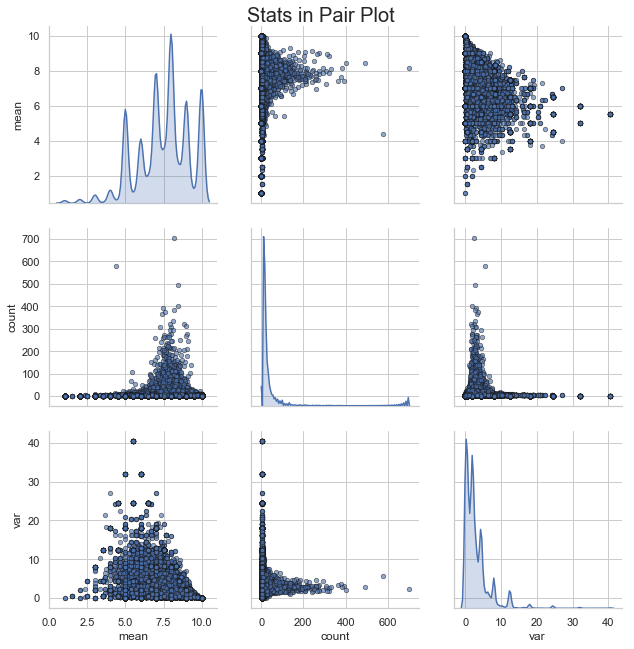

In [28]:
stats = df.groupby('book_title')['rate'].agg(['mean', 'count','std','var'])
sns.pairplot(stats[['mean', 'count', 'var']],diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},height = 3)
plt.suptitle('Stats in Pair Plot',y=1,fontsize=20)
plt.show()

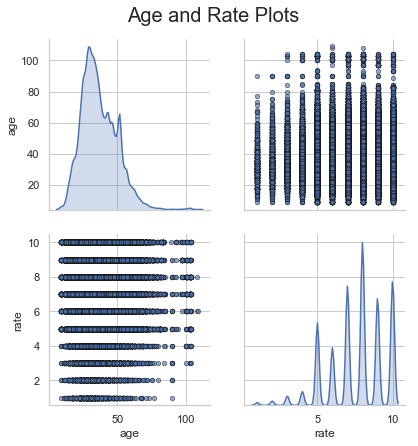

In [29]:
sns.pairplot(df[['age', 'rate']],diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': 'k'},height = 3)
plt.suptitle('Age and Rate Plots',y=1.03,fontsize=20)
plt.show()

In [30]:
x1 = df[(df.age >= 8)|(df.age <= 110)]
x2 = df[(df.rate >= 1)|(df.rate <= 10)]
x3 = df.groupby('user_id')['rate'].mean()
x4 = df.groupby('book_title')['rate'].mean()

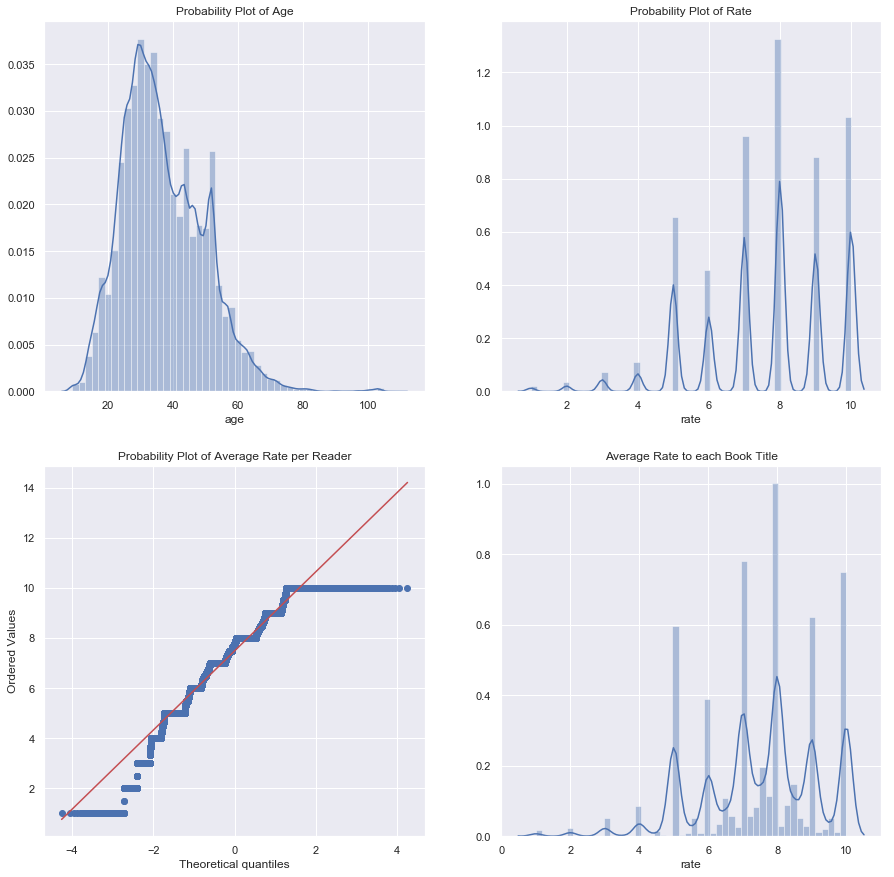

In [31]:
sns.set()
plt.subplots(figsize=(15,15))
plt.subplot(2,2,1)
sns.distplot(x1.age)
plt.title('Probability Plot of Age')
plt.subplot(2,2,2)
sns.distplot(x2.rate)
plt.title('Probability Plot of Rate')
plt.subplot(2,2,3)
from scipy import stats
stats.probplot(x3, plot=plt)
plt.title('Probability Plot of Average Rate per Reader')
plt.subplot(2,2,4)
sns.distplot(x4)
plt.title('Average Rate to each Book Title')
plt.show()

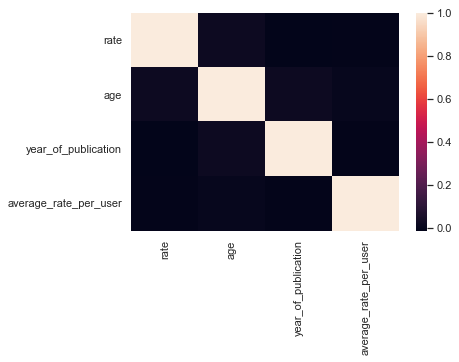

In [32]:
df['average_rate_per_user'] = df.groupby('user_id')['rate'].mean()
numerical_cols = ['rate', 'age', 'year_of_publication','average_rate_per_user']

corr = df[numerical_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()



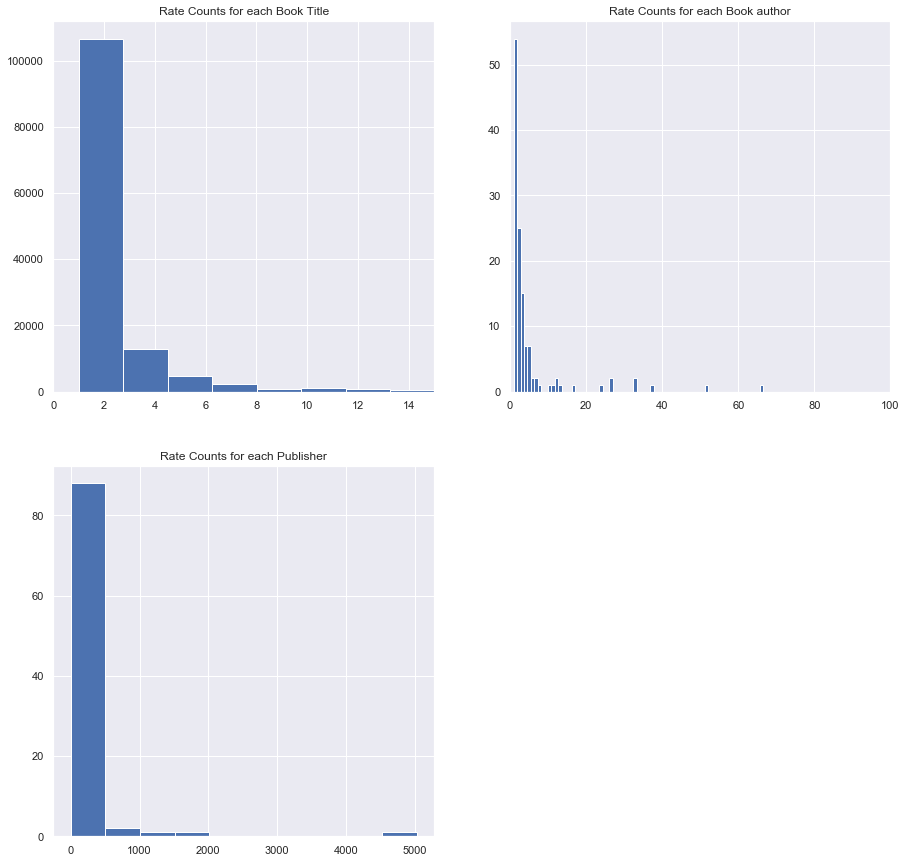

In [33]:
ratings_mean_count = pd.DataFrame(df.groupby('book_title')['rate'].mean())
ratings_mean_count['rating_title_count'] = pd.DataFrame(df.groupby('book_title')['rate'].count())
ratings_mean_count['rating_author_count'] = pd.DataFrame(df.groupby('book_author')['rate'].count())
ratings_mean_count['rating_publisher_count'] = pd.DataFrame(df.groupby('publisher')['rate'].count())
ratings_mean_count['rating_user_count'] = pd.DataFrame(df.groupby('user_id')['rate'].count())
plt.figure(figsize=(15,15))
sns.set_style('dark') 
#%matplotlib inline
plt.subplot(2,2,1)
plt.xlim([0, 15])
plt.title('Rate Counts for each Book Title')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_title_count'].hist(bins=400)
plt.subplot(2,2,2) 
plt.xlim([0, 100])
plt.title('Rate Counts for each Book author')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_author_count'].hist(bins=400)
plt.subplot(2,2,3)
plt.title('Rate Counts for each Publisher')
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_publisher_count'].hist(bins=10)
plt.show()

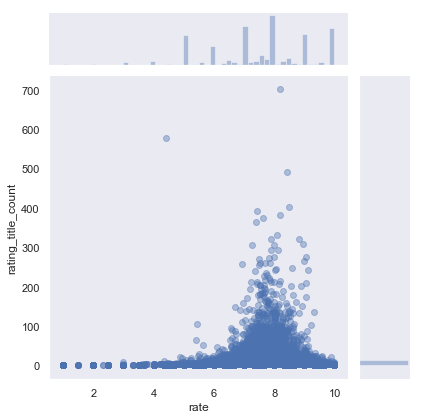

In [34]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rate', y='rating_title_count', data=ratings_mean_count, alpha=0.4) 
plt.show()

#### Conclusion

1) Majority of readers gave the rate of 8 by and 10,7 and 9 are the next popular rates.

2) Age range of 28-33 and 52 is the age range of readers. they give higher rates to the books as well.

3) story and novel books have the highest popularity. Da Vinci Code is one of the popular books. the rates for each one of the top 10 books have been visualized as well.

4) Stephen King is the most popular author with rates of 10 from many of the readers. top 10 Authors and their rates have been presented as well.

5) Ballentine book is the most frequent publisher. Top 10 publishers and their rates have been presented as well.

6) USA has the highest number of books. Top 5 countries have been presented.

7) Majority of books have been written between 1999-2003.

8) few outliers have been detected by using box plots, but they are in normal range, so they are not removed from dataset.

10) Mean, Count and Variance plots show they are skewed to one side.

11) Probabilty plots don't show any distribution.

12) Majority of books have just few rates in dataset. some of the book have many rates.

### Statistical Inference
We can test the age groups. but first, we should create different age groups. we first study distribution of rate and age columns. let's see if they have normal distribution. results show that none of them have normal distribution.

In [35]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['rate']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


In [36]:
# Using D'Agostino and Pearson's Test for normality test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# seed the random number generator
seed(1)
# generate univariate observations
data = df['age']
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


### 1) Does any age group give significantly higher rates compared to others?
1) First, create a new dataframe including user_id, age and rate. then drop the rows with missing age.
2) create the age groups from age.
3) do ANOVA to see if there is at least one significant group 
4) if so, do tukey test to find that group

In [37]:
(df.age.min(),df.age.max())

(9.0, 109.0)

In [38]:
# 1
df2 = df[['user_id','age','rate']]
df2.rate.fillna(0,inplace=True)
df2.dropna(subset=['age'],inplace=True)

In [39]:
# 2
def age_groups(x):
    if x.age <= 19:
        return '9-19'
    if x.age <= 25:
        return '19-25'
    if x.age <= 35:
        return '25-35'
    if x.age <= 45:
        return '35-45'
    if x.age <= 55:
        return '45-55'
    if x.age <= 65:
        return '55-65'
    if x.age <= 75:
        return '65-75'
    if x.age > 75:
        return '75+'
    
df2['age_category'] = df2.apply(age_groups, axis = 1)

In [40]:
# 3
from scipy import stats
F, p = stats.f_oneway(df2['rate'].loc[df2.age_category == '9-19'],df2['rate'].loc[df2.age_category == '19-25'],df2['rate'].loc[df2.age_category == '25-35'],df2['rate'].loc[df2.age_category == '35-45'],df2['rate'].loc[df2.age_category == '45-55'],df2['rate'].loc[df2.age_category == '55-65'],df2['rate'].loc[df2.age_category == '65-75'],df2['rate'].loc[df2.age_category == '75+'])
F,p

(94.88947634033022, 5.353069149955496e-139)

In [41]:
# 4
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df2['rate'],df2['age_category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
19-25  25-35   -0.064  -0.0998 -0.0282  True 
19-25  35-45   -0.01   -0.0481  0.0281 False 
19-25  45-55   0.1808   0.1406  0.221   True 
19-25  55-65   0.0117  -0.0425  0.0659 False 
19-25  65-75  -0.0634  -0.1612  0.0345 False 
19-25   75+   -0.4505  -0.6199 -0.2811  True 
19-25   9-19  -0.0699  -0.1239 -0.0159  True 
25-35  35-45   0.054    0.0252  0.0828  True 
25-35  45-55   0.2448   0.2133  0.2763  True 
25-35  55-65   0.0757   0.0275  0.1238  True 
25-35  65-75   0.0006   -0.094  0.0952 False 
25-35   75+   -0.3865   -0.554 -0.2189  True 
25-35   9-19  -0.0059  -0.0538  0.0421 False 
35-45  45-55   0.1908   0.1568  0.2248  True 
35-45  55-65   0.0217  -0.0281  0.0715 False 
35-45  65-75  -0.0534  -0.1489  0.0421 False 
35-45   75+   -0.4405  -0.6085 -0.2724  True 
35-45   9-19  -0.0599  -0.1095 -0.0102  True 
45-55  55-65  -0.1691  -0.220

### 2) Does readers give significantly higher rates to books in specific year of publication?
1) First, create a new dataframe including user_id, age and year_of_publication. then drop the rows with missing year of publication.
2) create the publication year groups.
3) do ANOVA to see if there is at least one significant group 
4) if so, do tukey test to find that group

In [42]:
# 1
df3 = df[['user_id','age','rate','book_title', 'year_of_publication']]
df3.rate.fillna(0,inplace=True)
df3.dropna(subset=['year_of_publication'],inplace=True)
(df3.year_of_publication.min(),df3.year_of_publication.max())

(1376.0, 2011.0)

In [43]:
# 2
def year_groups(x):
    if x.year_of_publication <= 1800:
        return '1800-'
    if x.year_of_publication <= 1850:
        return '1800-1850'
    if x.year_of_publication <= 1900:
        return '1850-1900'
    if x.year_of_publication <= 1950:
        return '1900-1950'
    if x.year_of_publication <= 1970:
        return '1950-1970'
    if x.year_of_publication <= 1990:
        return '1970-1990'
    if x.year_of_publication <= 2000:
        return '1990-2000'
    if x.year_of_publication > 2000:
        return '2000+'
    
df3['year_category'] = df3.apply(year_groups, axis = 1)

In [44]:
# 3
from scipy import stats
F, p = stats.f_oneway(df3['rate'].loc[df3.year_category == '1800-'],df3['rate'].loc[df3.year_category == '1800-1850'],df3['rate'].loc[df3.year_category == '1850-1900'],df3['rate'].loc[df3.year_category == '1900-1950'],df3['rate'].loc[df3.year_category == '1950-1970'],df3['rate'].loc[df3.year_category == '1970-1990'],df3['rate'].loc[df3.year_category == '1990-2000'],df3['rate'].loc[df3.year_category == '2000+'])
F,p

(65.62307920175337, 4.970405705723319e-95)

In [45]:
# 4
# Turkey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df3['rate'],df3['year_category'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
  group1    group2  meandiff  lower   upper  reject
---------------------------------------------------
  1800-   1800-1850   -2.0   -8.8302  4.8302 False 
  1800-   1850-1900   0.0    -6.8302  6.8302 False 
  1800-   1900-1950  1.0061  -2.9494  4.9615 False 
  1800-   1950-1970  0.9821  -2.9626  4.9268 False 
  1800-   1970-1990  0.6752  -3.2683  4.6187 False 
  1800-   1990-2000  0.573   -3.3704  4.5165 False 
  1800-     2000+    0.6853  -3.2582  4.6287 False 
1800-1850 1850-1900   2.0    -5.8869  9.8869 False 
1800-1850 1900-1950  3.0061  -2.5793  8.5915 False 
1800-1850 1950-1970  2.9821  -2.5957  8.5598 False 
1800-1850 1970-1990  2.6752  -2.9017  8.2521 False 
1800-1850 1990-2000  2.573   -3.0038  8.1499 False 
1800-1850   2000+    2.6853  -2.8916  8.2622 False 
1850-1900 1900-1950  1.0061  -4.5793  6.5915 False 
1850-1900 1950-1970  0.9821  -4.5957  6.5598 False 
1850-1900 1970-1990  0.6752  -4.9017  6.2521 False 
1850-1900 19

#### Conclusion

1) Overall, younger Adults have significantly more interest to read the books. for example, 19-25 range have signicantly more interest (and highest rates) compared to 25-35 and 35-45. range of 9-19 has less interest to read the books. Full results have been presented by using tukey test.

2) People don't have interest to older books. the books that published more recently have the highest rates. we can see a pattern by studying the year of publication. Full results have been presented in the table.